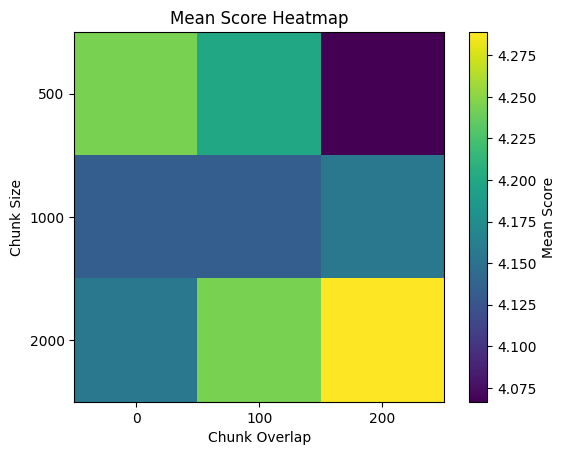

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Raw data
data = [
    (500, 0, 5, 4.066666667, 3.666666667),
    (500, 100, 5, 3.666666667, 3.933333333),
    (500, 200, 5, 3.733333333, 3.466666667),
    (1000, 0, 5, 3.466666667, 3.933333333),
    (1000, 100, 5, 3.733333333, 3.666666667),
    (1000, 200, 5, 3.733333333, 3.733333333),
    (2000, 0, 5, 3.666666667, 3.8),
    (2000, 100, 5, 3.733333333, 4.0),
    (2000, 200, 5, 3.866666667, 4.0),
]

df = pd.DataFrame(
    data,
    columns=["chunk_size", "overlap", "relevance", "groundedness", "retrieval_relevance"]
)

# 평균 점수
df["mean_score"] = df[["relevance", "groundedness", "retrieval_relevance"]].mean(axis=1)

# 히트맵용 pivot (chunk_size × overlap)
heatmap_data = df.pivot(
    index="chunk_size",
    columns="overlap",
    values="mean_score"
)

plt.figure()
plt.imshow(heatmap_data)
plt.colorbar(label="Mean Score")
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.xlabel("Chunk Overlap")
plt.ylabel("Chunk Size")
plt.title("Mean Score Heatmap")
plt.show()

/var/folders/th/_06yxhcs2qbfrt_wpsxb7vp00000gn/T/ipykernel_31916/248364376.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df_sorted["label"], rotation=45, ha="right")


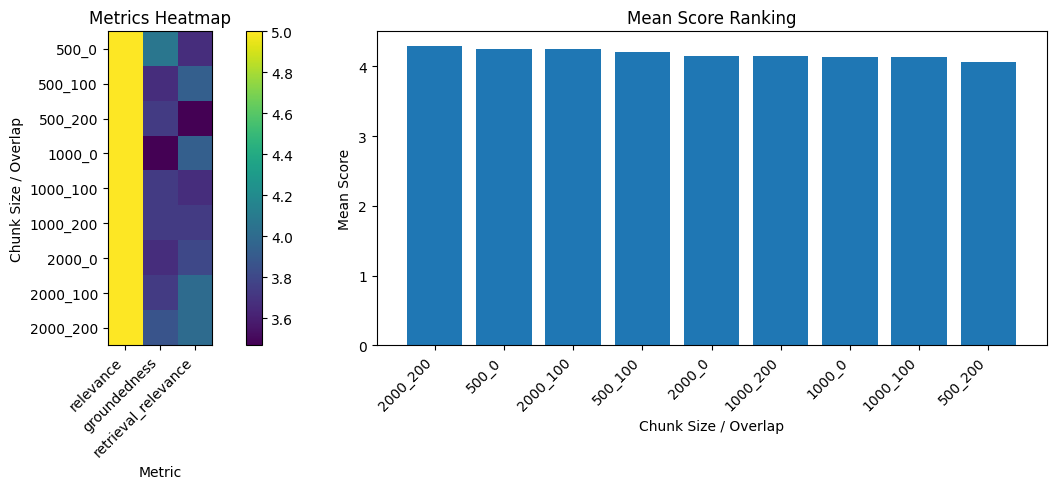

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ------------------------
# Data
# ------------------------
data = [
    (500, 0, 5, 4.066666667, 3.666666667),
    (500, 100, 5, 3.666666667, 3.933333333),
    (500, 200, 5, 3.733333333, 3.466666667),
    (1000, 0, 5, 3.466666667, 3.933333333),
    (1000, 100, 5, 3.733333333, 3.666666667),
    (1000, 200, 5, 3.733333333, 3.733333333),
    (2000, 0, 5, 3.666666667, 3.8),
    (2000, 100, 5, 3.733333333, 4.0),
    (2000, 200, 5, 3.866666667, 4.0),
]

df = pd.DataFrame(
    data,
    columns=[
        "chunk_size",
        "chunk_overlap",
        "relevance",
        "groundedness",
        "retrieval_relevance",
    ],
)

# label
df["label"] = df["chunk_size"].astype(str) + "_" + df["chunk_overlap"].astype(str)

# mean score
df["mean_score"] = df[
    ["relevance", "groundedness", "retrieval_relevance"]
].mean(axis=1)

# ------------------------
# Heatmap data
# ------------------------
heatmap_df = df.set_index("label")[
    ["relevance", "groundedness", "retrieval_relevance"]
]

# ------------------------
# Plot
# ------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- Heatmap ----
im = axes[0].imshow(heatmap_df.values)

axes[0].set_xticks(range(len(heatmap_df.columns)))
axes[0].set_xticklabels(heatmap_df.columns, rotation=45, ha="right")
axes[0].set_yticks(range(len(heatmap_df.index)))
axes[0].set_yticklabels(heatmap_df.index)

axes[0].set_title("Metrics Heatmap")
axes[0].set_xlabel("Metric")
axes[0].set_ylabel("Chunk Size / Overlap")

fig.colorbar(im, ax=axes[0])

# ---- Bar chart ----
df_sorted = df.sort_values("mean_score", ascending=False)

axes[1].bar(df_sorted["label"], df_sorted["mean_score"])
axes[1].set_title("Mean Score Ranking")
axes[1].set_ylabel("Mean Score")
axes[1].set_xlabel("Chunk Size / Overlap")
axes[1].set_xticklabels(df_sorted["label"], rotation=45, ha="right")

plt.tight_layout()
plt.show()